In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [53]:
df=pd.read_csv('ipl_data.csv')
df.head()

,mid,date,venue,bat_team,bowl_team,batsman,bowler,runs,wickets,overs,runs_last_5,wickets_last_5,striker,non-striker,total
0,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,SC Ganguly,P Kumar,1,0,0.1,1,0,0,0,222
1,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,1,0,0.2,1,0,0,0,222
2,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.2,2,0,0,0,222
3,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.3,2,0,0,0,222
4,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.4,2,0,0,0,222


In [54]:
df.shape

(76014, 15)

In [55]:
df.size

1140210

In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76014 entries, 0 to 76013
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   mid             76014 non-null  int64  
 1   date            76014 non-null  object 
 2   venue           76014 non-null  object 
 3   bat_team        76014 non-null  object 
 4   bowl_team       76014 non-null  object 
 5   batsman         76014 non-null  object 
 6   bowler          76014 non-null  object 
 7   runs            76014 non-null  int64  
 8   wickets         76014 non-null  int64  
 9   overs           76014 non-null  float64
 10  runs_last_5     76014 non-null  int64  
 11  wickets_last_5  76014 non-null  int64  
 12  striker         76014 non-null  int64  
 13  non-striker     76014 non-null  int64  
 14  total           76014 non-null  int64  
dtypes: float64(1), int64(8), object(6)
memory usage: 8.7+ MB


In [57]:
df.describe

<bound method NDFrame.describe of        mid        date                                      venue  \
0        1  2008-04-18                      M Chinnaswamy Stadium   
1        1  2008-04-18                      M Chinnaswamy Stadium   
2        1  2008-04-18                      M Chinnaswamy Stadium   
3        1  2008-04-18                      M Chinnaswamy Stadium   
4        1  2008-04-18                      M Chinnaswamy Stadium   
...    ...         ...                                        ...   
76009  617  2017-05-21  Rajiv Gandhi International Stadium, Uppal   
76010  617  2017-05-21  Rajiv Gandhi International Stadium, Uppal   
76011  617  2017-05-21  Rajiv Gandhi International Stadium, Uppal   
76012  617  2017-05-21  Rajiv Gandhi International Stadium, Uppal   
76013  617  2017-05-21  Rajiv Gandhi International Stadium, Uppal   

                    bat_team                    bowl_team      batsman  \
0      Kolkata Knight Riders  Royal Challengers Bangalore   SC 

In [58]:
df.dtypes

mid                 int64
date               object
venue              object
bat_team           object
bowl_team          object
batsman            object
bowler             object
runs                int64
wickets             int64
overs             float64
runs_last_5         int64
wickets_last_5      int64
striker             int64
non-striker         int64
total               int64
dtype: object

In [59]:
df.isnull().sum()

mid               0
date              0
venue             0
bat_team          0
bowl_team         0
batsman           0
bowler            0
runs              0
wickets           0
overs             0
runs_last_5       0
wickets_last_5    0
striker           0
non-striker       0
total             0
dtype: int64

As the given data set doesnot contains any null value so we are moving to visualization part

### Data Visualization 

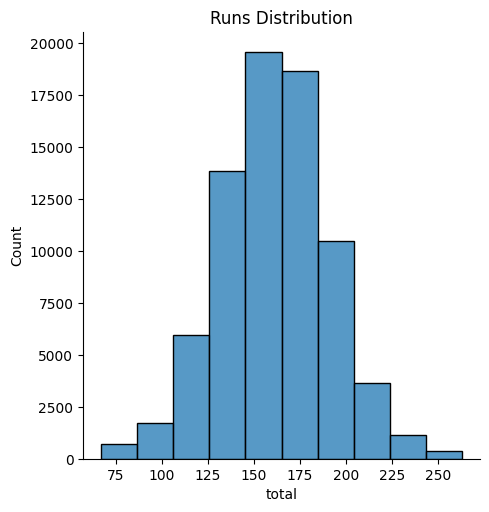

In [60]:
# Run Distribution displot
sns.displot(df['total'],kde=False,bins=10)
plt.title("Runs Distribution")

plt.show()

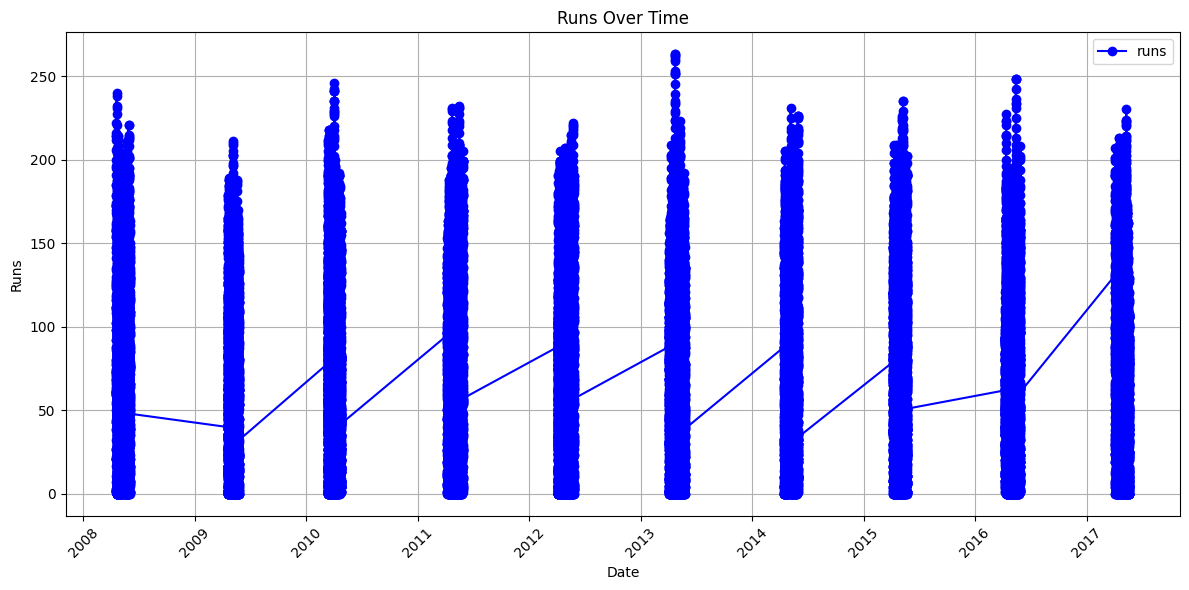

In [61]:
# Plotting Line Chart Runs over Time
df['date'] = pd.to_datetime(df['date'])
df = df.sort_values('date')
plt.figure(figsize=(12, 6))
plt.plot(df['date'], df['runs'], marker='o', linestyle='-', color='b', label='runs')
plt.xlabel('Date')
plt.ylabel('Runs')
plt.title('Runs Over Time')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [62]:
print(df.columns)

Index(['mid', 'date', 'venue', 'bat_team', 'bowl_team', 'batsman', 'bowler',
       'runs', 'wickets', 'overs', 'runs_last_5', 'wickets_last_5', 'striker',
       'non-striker', 'total'],
      dtype='object')


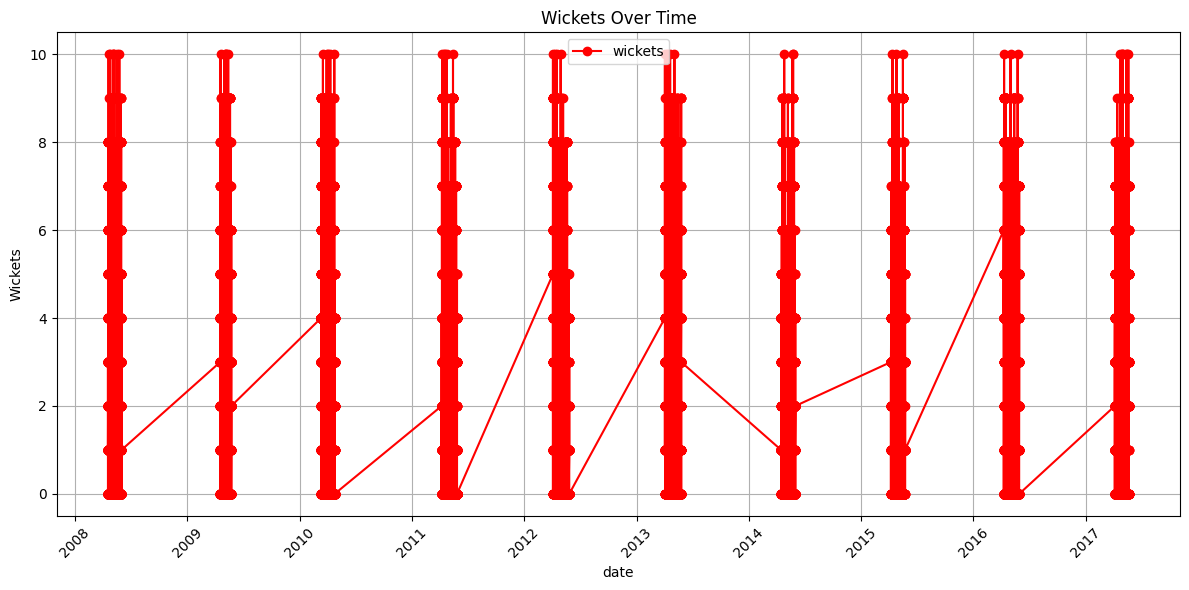

In [63]:
# Plotting Line chart of Wickets over Time
plt.figure(figsize=(12, 6))
plt.plot(df['date'], df['wickets'], marker='o', linestyle='-', color='r', label='wickets')
plt.xlabel('date')
plt.ylabel('Wickets')
plt.title('Wickets Over Time')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

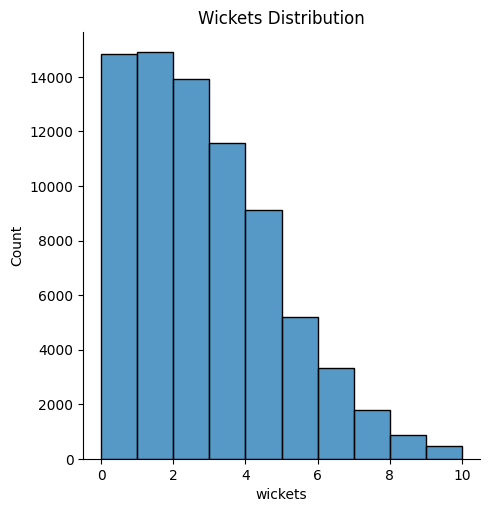

In [64]:
#Wickets Distribution
sns.displot(df['wickets'],kde=False,bins=10)
plt.title("Wickets Distribution")

plt.show()

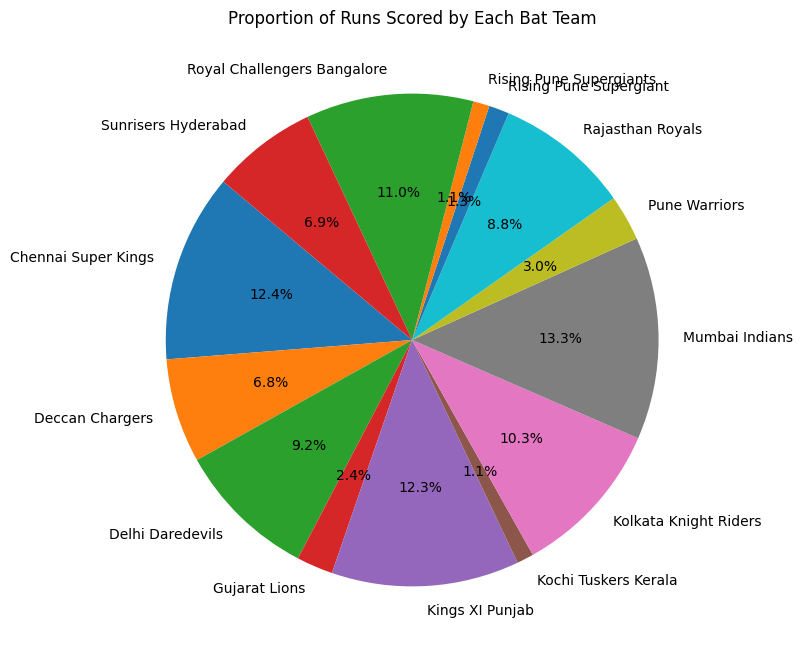

In [65]:
#  Plot pie chart
runs_by_team = df.groupby('bat_team')['runs'].sum()
plt.figure(figsize=(10, 8))
plt.pie(runs_by_team, labels=runs_by_team.index, autopct='%1.1f%%', startangle=140)
plt.title('Proportion of Runs Scored by Each Bat Team')
plt.show()

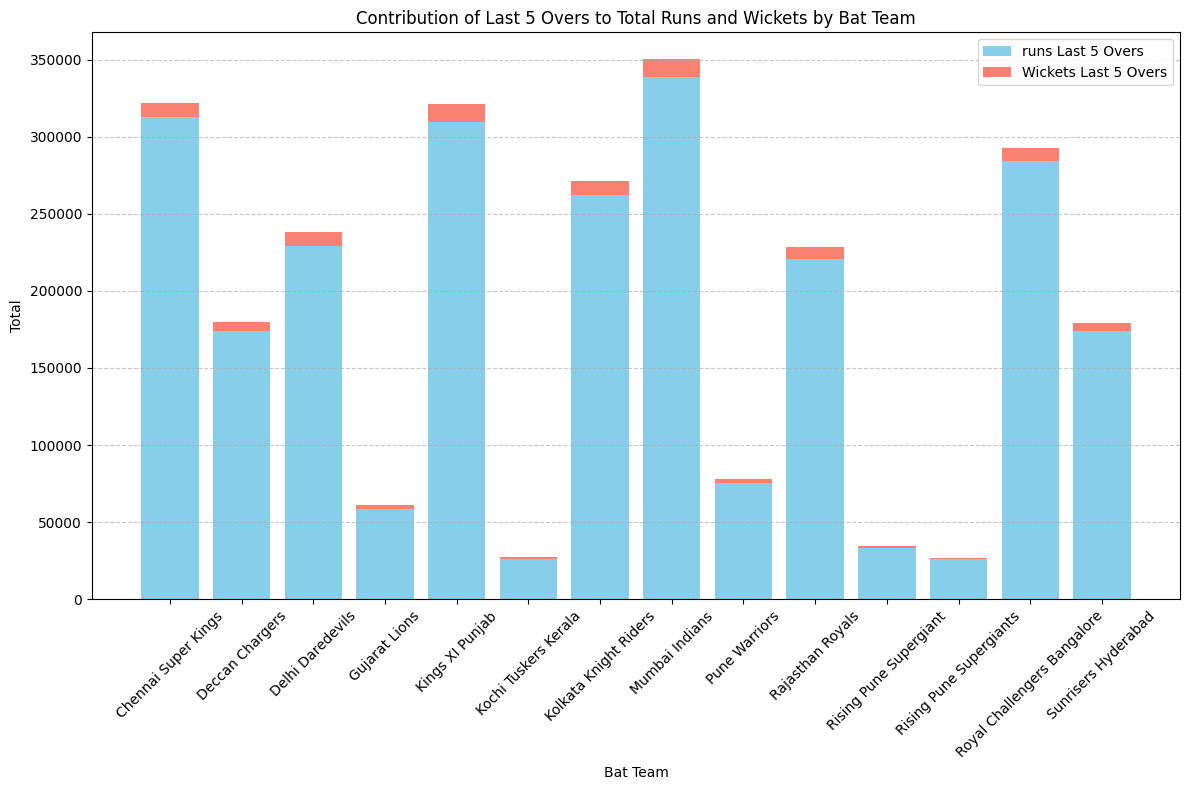

In [66]:
team_stats = df.groupby('bat_team').agg({'runs_last_5': 'sum', 'wickets_last_5': 'sum'}).reset_index()
plt.figure(figsize=(12, 8))
plt.bar(team_stats['bat_team'], team_stats['runs_last_5'], label='runs Last 5 Overs', color='skyblue')
plt.bar(team_stats['bat_team'], team_stats['wickets_last_5'], bottom=team_stats['runs_last_5'], label='Wickets Last 5 Overs', color='salmon')

plt.xlabel('Bat Team')
plt.ylabel('Total')
plt.title('Contribution of Last 5 Overs to Total Runs and Wickets by Bat Team')
plt.legend()
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [67]:
df.columns

Index(['mid', 'date', 'venue', 'bat_team', 'bowl_team', 'batsman', 'bowler',
       'runs', 'wickets', 'overs', 'runs_last_5', 'wickets_last_5', 'striker',
       'non-striker', 'total'],
      dtype='object')

Here, we can see that columns _['mid', 'date', 'venue', 'batsman', 'bowler', 'striker', 'non-striker']_ won't provide any relevant information for our model to train

In [68]:
### Data Cleaning For Training Models
irrelevant = ['mid', 'date', 'venue','batsman', 'bowler', 'striker', 'non-striker']
# Drop Irrelevant Columns
df = df.drop(irrelevant, axis=1) 
print(f'After Removing Irrelevant Columns : {df.shape}')
df.head()

After Removing Irrelevant Columns : (76014, 8)


,bat_team,bowl_team,runs,wickets,overs,runs_last_5,wickets_last_5,total
0,Kolkata Knight Riders,Royal Challengers Bangalore,1,0,0.1,1,0,222
90,Kolkata Knight Riders,Royal Challengers Bangalore,145,2,14.4,59,1,222
89,Kolkata Knight Riders,Royal Challengers Bangalore,141,2,14.3,61,1,222
88,Kolkata Knight Riders,Royal Challengers Bangalore,135,2,14.2,55,1,222
87,Kolkata Knight Riders,Royal Challengers Bangalore,134,2,14.1,55,1,222


Keeping Consistent Team

In [69]:
# Define Consistent Teams
const_teams = ['Kolkata Knight Riders', 'Chennai Super Kings', 'Rajasthan Royals',
              'Mumbai Indians', 'Kings XI Punjab', 'Royal Challengers Bangalore',
              'Delhi Daredevils', 'Sunrisers Hyderabad']

In [70]:
print(f'Before Removing Inconsistent Teams : {df.shape}')
df = df[(df['bat_team'].isin(const_teams)) & (df['bowl_team'].isin(const_teams))]
print(f'After Removing Irrelevant Columns : {df.shape}')
print(f"Consistent Teams : \n{df['bat_team'].unique()}")
df.head()

Before Removing Inconsistent Teams : (76014, 8)
After Removing Irrelevant Columns : (53811, 8)
Consistent Teams : 
['Kolkata Knight Riders' 'Rajasthan Royals' 'Chennai Super Kings'
 'Mumbai Indians' 'Kings XI Punjab' 'Royal Challengers Bangalore'
 'Delhi Daredevils' 'Sunrisers Hyderabad']


,bat_team,bowl_team,runs,wickets,overs,runs_last_5,wickets_last_5,total
0,Kolkata Knight Riders,Royal Challengers Bangalore,1,0,0.1,1,0,222
90,Kolkata Knight Riders,Royal Challengers Bangalore,145,2,14.4,59,1,222
89,Kolkata Knight Riders,Royal Challengers Bangalore,141,2,14.3,61,1,222
88,Kolkata Knight Riders,Royal Challengers Bangalore,135,2,14.2,55,1,222
87,Kolkata Knight Riders,Royal Challengers Bangalore,134,2,14.1,55,1,222


Remove first five overs of every match

In [71]:
print(f'Before Removing Overs : {df.shape}')
df = df[df['overs'] >= 5.0]
print(f'After Removing Overs : {df.shape}')
df.head()

Before Removing Overs : (53811, 8)
After Removing Overs : (40108, 8)


,bat_team,bowl_team,runs,wickets,overs,runs_last_5,wickets_last_5,total
90,Kolkata Knight Riders,Royal Challengers Bangalore,145,2,14.4,59,1,222
89,Kolkata Knight Riders,Royal Challengers Bangalore,141,2,14.3,61,1,222
88,Kolkata Knight Riders,Royal Challengers Bangalore,135,2,14.2,55,1,222
87,Kolkata Knight Riders,Royal Challengers Bangalore,134,2,14.1,55,1,222
86,Kolkata Knight Riders,Royal Challengers Bangalore,130,2,13.6,52,1,222


Plotting correlation Matrix of current data

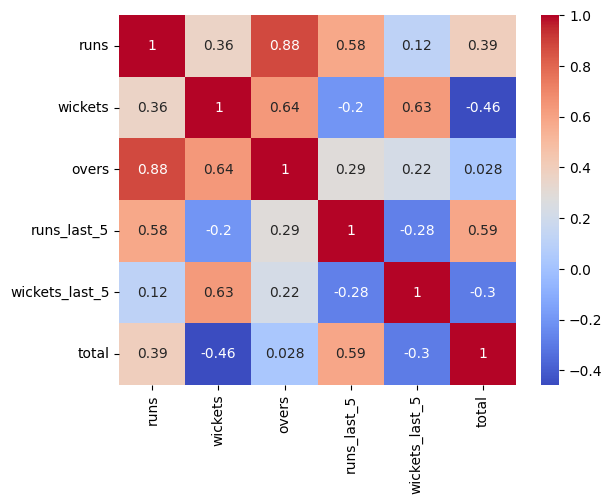

In [72]:
numeric_df = df.select_dtypes(include=['number'])

# Compute the correlation matrix
corr_matrix = numeric_df.corr()
# Create the heatmap
sns.heatmap(data=corr_matrix, annot=True, cmap='coolwarm')
plt.show()

### DATA PREPROCESSING AND TRAINING MODEL

In [73]:
#converting categorical data of bat_team and bowl_team 
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
le =LabelEncoder()
for col in ['bat_team','bowl_team']:
     df[col] = le.fit_transform(df[col])

df.head()


,bat_team,bowl_team,runs,wickets,overs,runs_last_5,wickets_last_5,total
90,3,6,145,2,14.4,59,1,222
89,3,6,141,2,14.3,61,1,222
88,3,6,135,2,14.2,55,1,222
87,3,6,134,2,14.1,55,1,222
86,3,6,130,2,13.6,52,1,222


In [74]:
from sklearn.compose import ColumnTransformer
columnTransformer = ColumnTransformer([('encoder', OneHotEncoder(), [0, 1])], remainder='passthrough')
columnTransformer

ColumnTransformer(remainder='passthrough',
                  transformers=[('encoder', OneHotEncoder(), [0, 1])])

Save the numpy array in the new DataFrame with transformmed column

In [75]:
# print(df.head())
# print(df.shape)
df = np.array(columnTransformer.fit_transform(df))

# print(df)

num_columns = df.shape[1]
num_columns

22

In [76]:
len(list(df[0]))

22

In [77]:
cols = ['batting_team_Chennai Super Kings', 'batting_team_Delhi Daredevils', 'batting_team_Kings XI Punjab',
              'batting_team_Kolkata Knight Riders', 'batting_team_Mumbai Indians', 'batting_team_Rajasthan Royals',
              'batting_team_Royal Challengers Bangalore', 'batting_team_Sunrisers Hyderabad',
              'bowling_team_Chennai Super Kings', 'bowling_team_Delhi Daredevils', 'bowling_team_Kings XI Punjab',
              'bowling_team_Kolkata Knight Riders', 'bowling_team_Mumbai Indians', 'bowling_team_Rajasthan Royals',
              'bowling_team_Royal Challengers Bangalore', 'bowling_team_Sunrisers Hyderabad', 'runs', 'wickets', 'overs',
       'runs_last_5', 'wickets_last_5', 'total']
# len(cols)
df1 = pd.DataFrame(df, columns=cols)

In [78]:
df1.head()

,batting_team_Chennai Super Kings,batting_team_Delhi Daredevils,batting_team_Kings XI Punjab,batting_team_Kolkata Knight Riders,batting_team_Mumbai Indians,batting_team_Rajasthan Royals,batting_team_Royal Challengers Bangalore,batting_team_Sunrisers Hyderabad,bowling_team_Chennai Super Kings,bowling_team_Delhi Daredevils,...,bowling_team_Mumbai Indians,bowling_team_Rajasthan Royals,bowling_team_Royal Challengers Bangalore,bowling_team_Sunrisers Hyderabad,runs,wickets,overs,runs_last_5,wickets_last_5,total
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,145.0,2.0,14.4,59.0,1.0,222.0
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,141.0,2.0,14.3,61.0,1.0,222.0
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,135.0,2.0,14.2,55.0,1.0,222.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,134.0,2.0,14.1,55.0,1.0,222.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,130.0,2.0,13.6,52.0,1.0,222.0


### MODEL BUILDING

In [79]:
features = df1.drop(['total'], axis=1)
labels = df1['total']

In [80]:
from sklearn.model_selection import train_test_split
train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size=0.20, shuffle=True)
print(f"Training Set : {train_features.shape}\nTesting Set : {test_features.shape}")

Training Set : (32086, 21)
Testing Set : (8022, 21)


### ML ALGORITHMS

In [81]:
models = dict()

Decision Tree  Regressor 

In [82]:
from sklearn.tree import DecisionTreeRegressor
tree = DecisionTreeRegressor()
# Train Model
tree.fit(train_features, train_labels)

DecisionTreeRegressor()

In [83]:
# Evaluate Model
train_score_tree = str(tree.score(train_features, train_labels) * 100)
test_score_tree = str(tree.score(test_features, test_labels) * 100)
print(f'Train Score : {train_score_tree[:5]}%\nTest Score : {test_score_tree[:5]}%')
models["tree"] = test_score_tree


Train Score : 99.99%
Test Score : 85.83%


In [84]:
from sklearn.metrics import mean_absolute_error as mae, mean_squared_error as mse
print("---- Decision Tree Regressor - Model Evaluation ----")
print("Mean Absolute Error (MAE): {}".format(mae(test_labels, tree.predict(test_features))))
print("Mean Squared Error (MSE): {}".format(mse(test_labels, tree.predict(test_features))))
print("Root Mean Squared Error (RMSE): {}".format(np.sqrt(mse(test_labels, tree.predict(test_features)))))

---- Decision Tree Regressor - Model Evaluation ----
Mean Absolute Error (MAE): 3.9854774370481176
Mean Squared Error (MSE): 123.04278858140114
Root Mean Squared Error (RMSE): 11.092465396898975


Linear Regression


In [85]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
# Train Model
linreg.fit(train_features, train_labels)

LinearRegression()

In [86]:
# Evaluate Model
train_score_linreg = str(linreg.score(train_features, train_labels) * 100)
test_score_linreg = str(linreg.score(test_features, test_labels) * 100)
print(f'Train Score : {train_score_linreg[:5]}%\nTest Score : {test_score_linreg[:5]}%')
models["linreg"] = test_score_linreg

Train Score : 65.85%
Test Score : 66.15%


In [87]:
print("---- Linear Regression - Model Evaluation ----")
print("Mean Absolute Error (MAE): {}".format(mae(test_labels, linreg.predict(test_features))))
print("Mean Squared Error (MSE): {}".format(mse(test_labels, linreg.predict(test_features))))
print("Root Mean Squared Error (RMSE): {}".format(np.sqrt(mse(test_labels, linreg.predict(test_features)))))

---- Linear Regression - Model Evaluation ----
Mean Absolute Error (MAE): 12.946590989464033
Mean Squared Error (MSE): 293.9639007082728
Root Mean Squared Error (RMSE): 17.145375490442685


Random Forest Regression

In [88]:
from sklearn.ensemble import RandomForestRegressor
forest = RandomForestRegressor()
# Train Model
forest.fit(train_features, train_labels)

RandomForestRegressor()

In [89]:
# Evaluate Model
train_score_forest = str(forest.score(train_features, train_labels)*100)
test_score_forest = str(forest.score(test_features, test_labels)*100)
print(f'Train Score : {train_score_forest[:5]}%\nTest Score : {test_score_forest[:5]}%')
models["forest"] = test_score_forest

Train Score : 99.06%
Test Score : 93.40%


In [90]:
print("---- Random Forest Regression - Model Evaluation ----")
print("Mean Absolute Error (MAE): {}".format(mae(test_labels, forest.predict(test_features))))
print("Mean Squared Error (MSE): {}".format(mse(test_labels, forest.predict(test_features))))
print("Root Mean Squared Error (RMSE): {}".format(np.sqrt(mse(test_labels, forest.predict(test_features)))))

---- Random Forest Regression - Model Evaluation ----
Mean Absolute Error (MAE): 4.466643447780508
Mean Squared Error (MSE): 57.27192170853869
Root Mean Squared Error (RMSE): 7.567821463838764


SVM

In [91]:
from sklearn.svm import SVR
svm = SVR()
# Train Model
svm.fit(train_features, train_labels)

SVR()

In [92]:
train_score_svm = str(svm.score(train_features, train_labels)*100)
test_score_svm = str(svm.score(test_features, test_labels)*100)
print(f'Train Score : {train_score_svm[:5]}%\nTest Score : {test_score_svm[:5]}%')
models["svm"] = test_score_svm 

Train Score : 57.49%
Test Score : 57.48%


In [93]:
print("---- Support Vector Regression - Model Evaluation ----")
print("Mean Absolute Error (MAE): {}".format(mae(test_labels, svm.predict(test_features))))
print("Mean Squared Error (MSE): {}".format(mse(test_labels, svm.predict(test_features))))
print("Root Mean Squared Error (RMSE): {}".format(np.sqrt(mse(test_labels, svm.predict(test_features)))))

---- Support Vector Regression - Model Evaluation ----
Mean Absolute Error (MAE): 14.552739848780352
Mean Squared Error (MSE): 369.2833290109128
Root Mean Squared Error (RMSE): 19.216746056783723


KNR

In [94]:
from sklearn.neighbors import KNeighborsRegressor
knr = KNeighborsRegressor()
# Train Model
knr.fit(train_features, train_labels)

KNeighborsRegressor()

In [95]:
train_score_knr = str(knr.score(train_features, train_labels)*100)
test_score_knr = str(knr.score(test_features, test_labels)*100)
print(f'Train Score : {train_score_knr[:5]}%\nTest Score : {test_score_knr[:5]}%')
models["knr"] = test_score_knr

Train Score : 86.79%
Test Score : 77.68%


In [96]:
print("---- KNR - Model Evaluation ----")
print("Mean Absolute Error (MAE): {}".format(mae(test_labels, knr.predict(test_features))))
print("Mean Squared Error (MSE): {}".format(mse(test_labels, knr.predict(test_features))))
print("Root Mean Squared Error (RMSE): {}".format(np.sqrt(mse(test_labels, knr.predict(test_features)))))

---- KNR - Model Evaluation ----
Mean Absolute Error (MAE): 9.739715781600598
Mean Squared Error (MSE): 193.81476938419348
Root Mean Squared Error (RMSE): 13.921737297628967


### BEST MODEL

<BarContainer object of 5 artists>

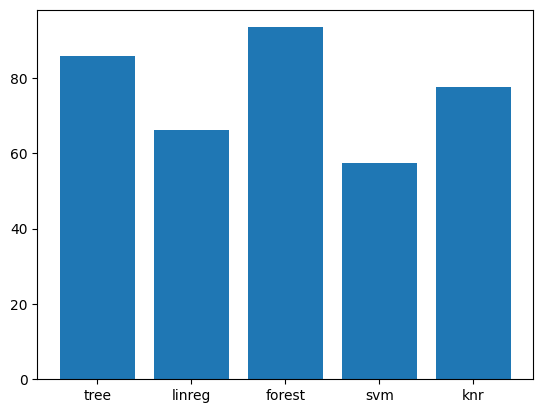

In [97]:
import matplotlib.pyplot as plt 
model_names = list(models.keys())
accuracy = list(map(float, models.values()))
# creating the bar plot
plt.bar(model_names, accuracy)

From above, we can see that "Random Forest" performed the best, closely followed by "Decision Tree" and "KNR". So we will be choosing Random Forest for the final model

### PREDICTION

In [98]:
def score_predict(batting_team, bowling_team, runs, wickets, overs, runs_last_5, wickets_last_5, model=forest):
  prediction_array = []
  # Batting Team
  if batting_team == 'Chennai Super Kings':
    prediction_array = prediction_array + [1,0,0,0,0,0,0,0]
  elif batting_team == 'Delhi Daredevils':
    prediction_array = prediction_array + [0,1,0,0,0,0,0,0]
  elif batting_team == 'Kings XI Punjab':
    prediction_array = prediction_array + [0,0,1,0,0,0,0,0]
  elif batting_team == 'Kolkata Knight Riders':
    prediction_array = prediction_array + [0,0,0,1,0,0,0,0]
  elif batting_team == 'Mumbai Indians':
    prediction_array = prediction_array + [0,0,0,0,1,0,0,0]
  elif batting_team == 'Rajasthan Royals':
    prediction_array = prediction_array + [0,0,0,0,0,1,0,0]
  elif batting_team == 'Royal Challengers Bangalore':
    prediction_array = prediction_array + [0,0,0,0,0,0,1,0]
  elif batting_team == 'Sunrisers Hyderabad':
    prediction_array = prediction_array + [0,0,0,0,0,0,0,1]

  # Bowling Team
  
  if bowling_team == 'Chennai Super Kings':
    prediction_array = prediction_array + [1,0,0,0,0,0,0,0]
  elif bowling_team == 'Delhi Daredevils':
    prediction_array = prediction_array + [0,1,0,0,0,0,0,0]
  elif bowling_team == 'Kings XI Punjab':
    prediction_array = prediction_array + [0,0,1,0,0,0,0,0]
  elif bowling_team == 'Kolkata Knight Riders':
    prediction_array = prediction_array + [0,0,0,1,0,0,0,0]
  elif bowling_team == 'Mumbai Indians':
    prediction_array = prediction_array + [0,0,0,0,1,0,0,0]
  elif bowling_team == 'Rajasthan Royals':
    prediction_array = prediction_array + [0,0,0,0,0,1,0,0]
  elif bowling_team == 'Royal Challengers Bangalore':
    prediction_array = prediction_array + [0,0,0,0,0,0,1,0]
  elif bowling_team == 'Sunrisers Hyderabad':
    prediction_array = prediction_array + [0,0,0,0,0,0,0,1]
  prediction_array = prediction_array + [runs, wickets, overs, runs_last_5, wickets_last_5]
  prediction_array = np.array([prediction_array])
  pred = model.predict(prediction_array)
  return int(round(pred[0]))

### Test 1
- Batting Team : **Delhi Daredevils**
- Bowling Team : **Chennai Super Kings**
- Final Score : **147/9**

In [99]:
batting_team='Delhi Daredevils'
bowling_team='Chennai Super Kings'
score = score_predict(batting_team, bowling_team, overs=10.2, runs=68, wickets=3, runs_last_5=29, wickets_last_5=1)
print(f'Predicted Score : {score} || Actual Score : 147')

Predicted Score : 147 || Actual Score : 147


c:\Users\hp\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


### Test 2
- Batting Team : **Mumbai Indians**
- Bowling Team : **Kings XI Punjab**
- Final Score : **176/7**

In [100]:
batting_team='Mumbai Indians'
bowling_team='Kings XI Punjab'
score = score_predict(batting_team, bowling_team, overs=12.3, runs=113, wickets=2, runs_last_5=55, wickets_last_5=0)
print(f'Predicted Score : {score} || Actual Score : 176')

Predicted Score : 186 || Actual Score : 176


c:\Users\hp\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


### Test 4
- Batting Team : **Kolkata Knight Riders**
- Bowling Team : **Chennai Super Kings**
- Final Score : **172/5**

In [101]:
batting_team="Kolkata Knight Riders"
bowling_team="Chennai Super Kings"
score = score_predict(batting_team, bowling_team, overs=18.0, runs=150, wickets=4, runs_last_5=57, wickets_last_5=1)
print(f'Predicted Score : {score} || Actual Score : 172')

Predicted Score : 173 || Actual Score : 172


c:\Users\hp\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


In [102]:
# import pickle
# filename = "ml_model.pkl"
# pickle.dump(forest, open(filename, "wb"))